<a href="https://colab.research.google.com/github/viktorngkhnh/Sunspots_Practice/blob/main/Colab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
=== Linear Regression ===
MSE: 315.79040686164717
MAE: 12.817080513957055


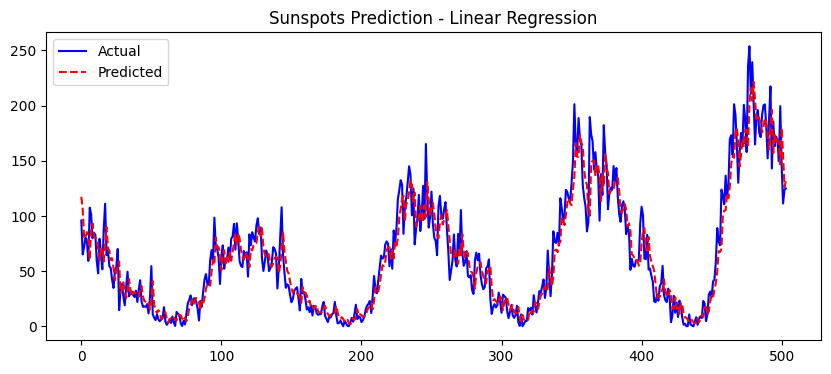

In [14]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Connect Drive

drive.mount('/content/drive', force_remount=True)
# !ls "/content/drive/MyDrive/Sunspots_training"

df = pd.read_csv('/content/drive/MyDrive/Sunspots_training/Sunset_Train.txt')

series = df['Sunspots'].values

# ===============================
def create_dataset(series, window_size):
    X, y = [], []
    for i in range(len(series) - window_size):
        X.append(series[i:i+window_size])
        y.append(series[i+window_size])
    return np.array(X), np.array(y)

window_size = 12
X, y = create_dataset(series, window_size)


split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled  = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))

# =====Train Linear Regression=====

model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train_scaled)

# ========Predict=============

y_pred_scaled = model_lr.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# ========Evaluation=============
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("=== Linear Regression ===")
print("MSE:", mse)
print("MAE:", mae)



#======Result============
t = np.arange(len(y_test))

plt.figure(figsize=(10,4))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red', linestyle='--')
plt.title("Sunspots Prediction - Linear Regression")
plt.legend()
plt.show()



=== Linear Regression ===
MSE: 15.239855955155434
MAE: 2.842905625158402


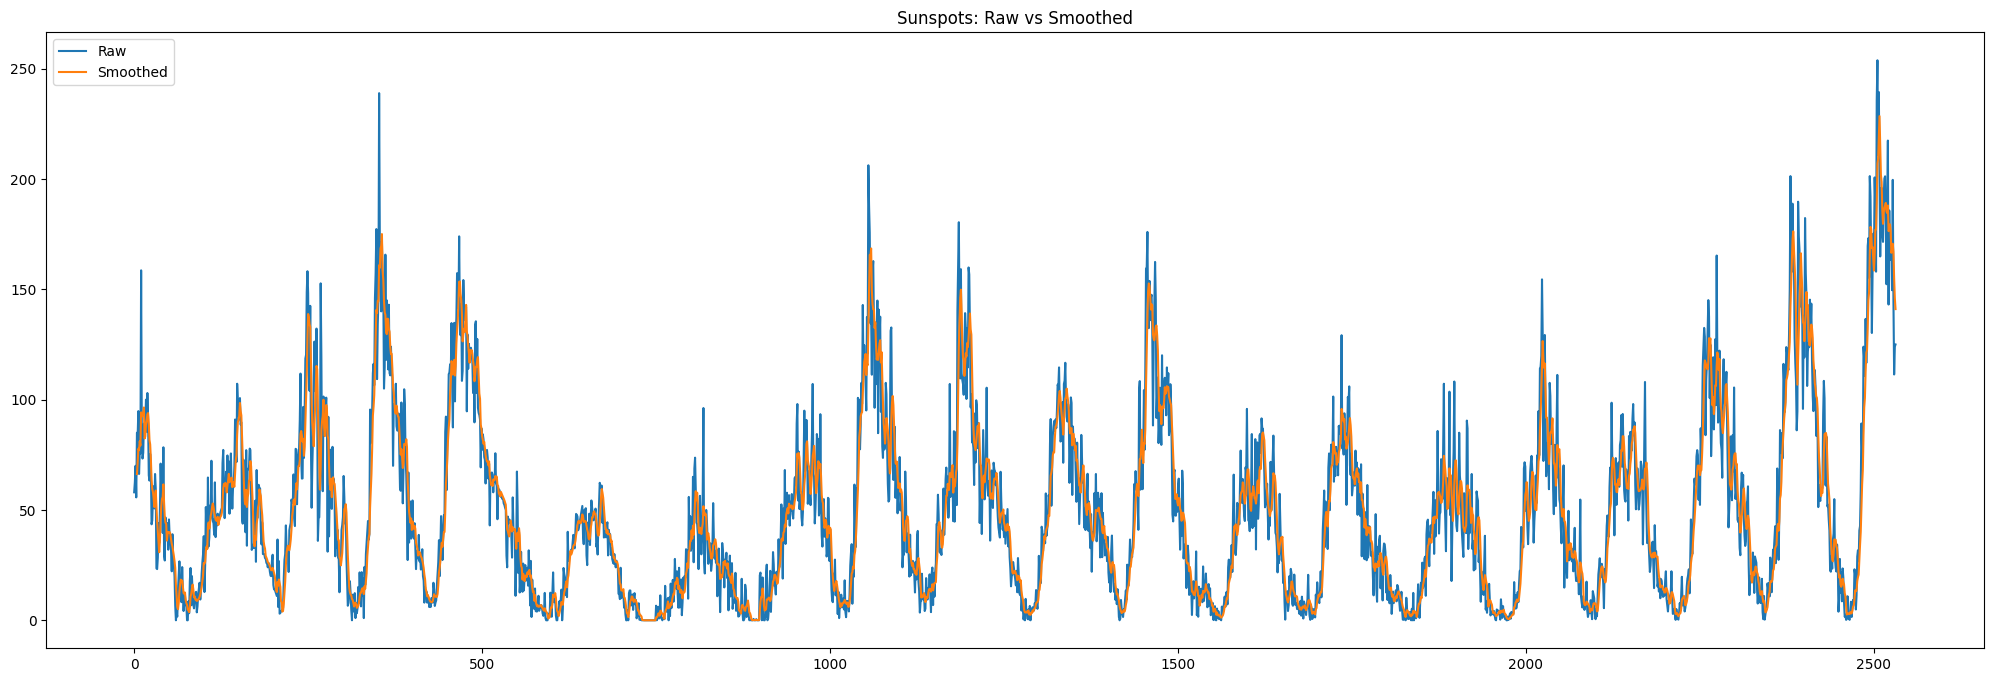

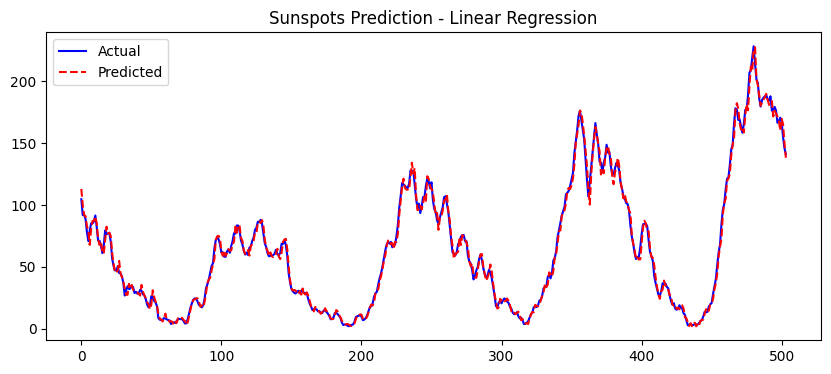

In [15]:

#====Add the pre-processing======
def moving_average(series, window):
    return np.convolve(series, np.ones(window)/window, mode='valid')

smooth_window = 5
series_smooth = moving_average(series, smooth_window)


window_size = 12
X, y = create_dataset(series_smooth, window_size)


split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled  = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))

# =====Train Linear Regression=====

model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train_scaled)

# ========Predict=============

y_pred_scaled = model_lr.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# ========Evaluation=============
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("=== Linear Regression ===")
print("MSE:", mse)
print("MAE:", mae)



#======Result============
t = np.arange(len(y_test))


plt.figure(figsize=(25,8))
plt.plot(series, label="Raw")
plt.plot(
    np.arange(smooth_window-1, len(series)),
    series_smooth,
    label="Smoothed"
)
plt.legend()
plt.title("Sunspots: Raw vs Smoothed")
plt.show()


plt.figure(figsize=(10,4))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red', linestyle='--')
plt.title("Sunspots Prediction - Linear Regression")
plt.legend()
plt.show()



Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1052.2817 - val_loss: 71.1434
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 77.2705 - val_loss: 54.5843
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 55.4077 - val_loss: 44.8040
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39.3502 - val_loss: 38.0772
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 34.6666 - val_loss: 36.3772
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 24.4292 - val_loss: 30.0376
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 24.8118 - val_loss: 27.1931
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.4568 - val_loss: 25.0738
Epoch 9/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 21.1753 - val_loss: 25.6238
Epoch 10/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19.6305 - val_loss: 23.3576
Epoch 11/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18.7322 - val_loss: 23.1253
Epoch 12/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1

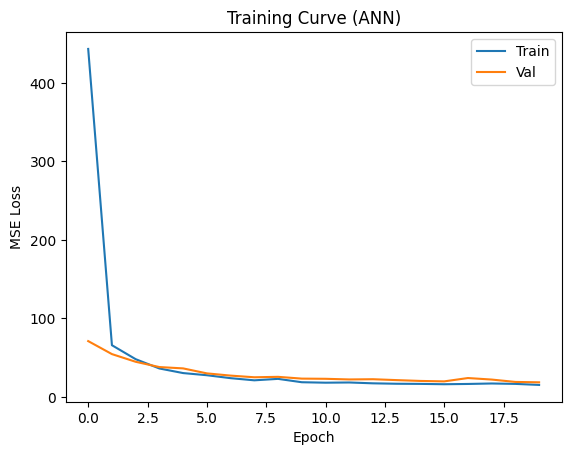

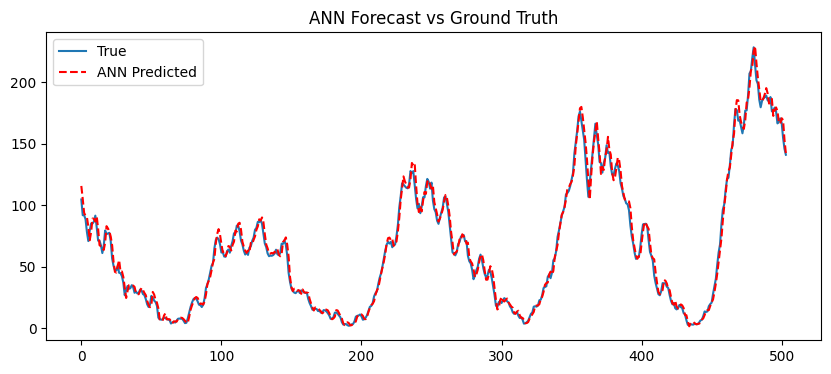

In [17]:

######## Build ANN model ###########
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1)
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse'
)

######### Train ANN  ##########
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)


y_pred_ann = model.predict(X_test).flatten()

mse_ann = mean_squared_error(y_test, y_pred_ann)
mae_ann = mean_absolute_error(y_test, y_pred_ann)

print("ANN MSE:", mse_ann)
print("ANN MAE:", mae_ann)

plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.title("Training Curve (ANN)")
plt.show()

plt.figure(figsize=(10,4))
plt.plot(y_test, label="True")
plt.plot(y_pred_ann, label="ANN Predicted", color='red', linestyle='--')
plt.legend()
plt.title("ANN Forecast vs Ground Truth")
plt.show()

# print(len(y_test))
# print(y_test[:5])
# print(y_test[-5:])